In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

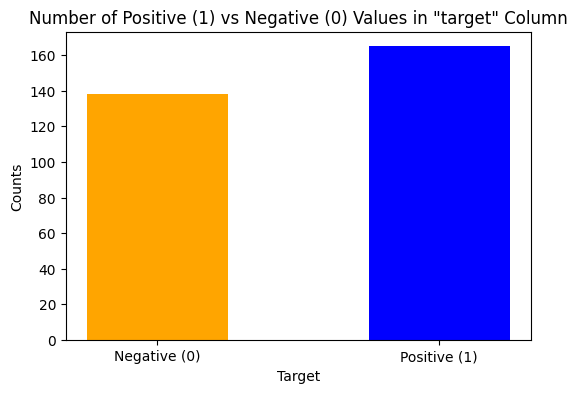

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   

In [2]:
#2.1 Preprocess the raw data
df = pd.read_csv('heart.csv')

Heart = df.values[:, 1:-1]

# Extracting only the "target" column
target_column = df['target']

# Counting positive (1) and negative (0) values
positive_count = (target_column == 1).sum()
negative_count = (target_column == 0).sum()

# Creating a bar plot
plt.figure(figsize=(6, 4))

# Bar positions and heights
positions = [0, 1]
heights = [negative_count, positive_count]

# Bar labels
labels = ['Negative (0)', 'Positive (1)']

plt.bar(positions, heights, tick_label=labels, color=['orange', 'blue'], width = 0.5)
plt.xlabel('Target')
plt.ylabel('Counts')
plt.title('Number of Positive (1) vs Negative (0) Values in "target" Column')

plt.show()


print(df.isnull().sum())
print(df.info)

#Data is fairly balanced

In [3]:
#2.2 Split the data into two subsets and normalize the features of samples
heart_fea = df.drop('target', axis=1).values
target = df['target'].values


X_train_val, X_test, y_train_val, y_test = train_test_split(heart_fea, target, 
                                                            test_size=0.14, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 260, test: 43


In [4]:
k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.8038461538461539
{'n_neighbors': 3}


In [7]:
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)

acc = np.sum(y_test_pred == y_test)/len(y_test)

# confustion matrix to compute TP, FP, TN, FN to determine recall, precision, and f1 score
conf_matrix = confusion_matrix(y_test, y_test_pred)

# extract TP, FP, TN, FN from the confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]


recall = TP/(TP + FN)
precision = TP/(TP + FP)
f1 = 2*(recall*precision)/(recall + precision)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.837, recall: 0.857, precision: 0.818, f1: 0.837,
